<a href="https://colab.research.google.com/github/tony1966/colab/blob/main/reinforcement_learning_ch3_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels)=boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [4]:
print(type(train_data))
print(type(train_labels))
print(type(test_data))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [7]:
print(train_data[0:5])

[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]
 [3.96100e-02 0.00000e+00 5.19000e+00 0.00000e+00 5.15000e-01 6.03700e+00
  3.45000e+01 5.98530e+00 5.00000e+00 2.24000e+02 2.02000e+01 3.96900e+02
  8.01000e+00]
 [3.69311e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.37600e+00
  8.84000e+01 2.56710e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.91430e+02
  1.46500e+01]]


In [8]:
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df=pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [9]:
print(train_labels[0:5])

[15.2 42.3 50.  21.1 17.7]


In [10]:
# 訓練集洗牌
order=np.random.randint(0,404, size=404)
train_data=train_data[order]
train_labels=train_labels[order]

In [11]:
# 訓練集正規化
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data=(train_data - mean) / std
test_data=(test_data - mean) / std

In [12]:
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
       'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df=pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.901878,-0.461410,1.027240,-0.251312,1.310242,-0.032200,0.920596,-0.715883,1.624909,1.522044,0.749116,-2.584023,0.284965
1,1.172078,-0.461410,1.027240,-0.251312,1.197084,-1.316122,1.035190,-1.113385,1.624909,1.522044,0.749116,0.465747,2.408078
2,-0.392478,1.275462,-1.502692,-0.251312,-1.161830,0.975906,-1.315837,2.564540,-0.996385,-0.482800,0.529714,0.393175,-0.974785
3,-0.393307,3.663661,-1.287985,-0.251312,-1.274118,2.485997,-1.411948,0.730021,-0.654477,-1.155120,-1.664305,0.400380,-1.383389
4,-0.194826,-0.461410,1.249453,-0.251312,2.685550,-0.720360,1.049976,-1.014970,-0.540508,-0.070929,-1.664305,-0.923413,0.369130


In [13]:
model=Sequential()
model.add(Dense(16, activation='relu', input_shape=(13,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [14]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mae'])

In [15]:
early_stop=EarlyStopping(monitor='val_loss', patience=20)

In [16]:
history=model.fit(train_data, train_labels, batch_size=32, epochs=500, 
    validation_split=0.2, callbacks=[early_stop])

Epoch 1/500
11/11 [==============================] - 1s 17ms/step - loss: 564.3508 - mae: 22.1166 - val_loss: 668.6978 - val_mae: 23.9456
Epoch 2/500
11/11 [==============================] - 0s 6ms/step - loss: 549.8450 - mae: 21.8129 - val_loss: 651.6115 - val_mae: 23.6225
Epoch 3/500
11/11 [==============================] - 0s 3ms/step - loss: 536.0732 - mae: 21.5222 - val_loss: 634.8756 - val_mae: 23.3017
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 522.0463 - mae: 21.2285 - val_loss: 617.8379 - val_mae: 22.9710
Epoch 5/500
11/11 [==============================] - 0s 4ms/step - loss: 507.8303 - mae: 20.9204 - val_loss: 599.5863 - val_mae: 22.6128
Epoch 6/500
11/11 [==============================] - 0s 3ms/step - loss: 491.7298 - mae: 20.5781 - val_loss: 580.0970 - val_mae: 22.2212
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 474.5190 - mae: 20.2026 - val_loss: 557.5466 - val_mae: 21.7612
Epoch 8/500
11/11 [=====================

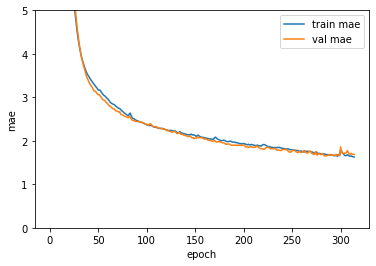

In [17]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae') 
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

In [18]:
test_loss, test_mae=model.evaluate(test_data, test_labels)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

4/4 [==============================] - 0s 3ms/step - loss: 17.8420 - mae: 2.7829
loss:17.842
mae: 2.783


In [19]:
# 顯示測試集的標籤價格
print('前 10 筆測試標籤:',np.round(test_labels[0:10]))
# 顯示預測結果的價格
test_predictions=model.predict(test_data[0:10]).flatten()
print('前 10 筆預測結果:',np.round(test_predictions))

前 10 筆測試標籤: [ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
前 10 筆預測結果: [ 9. 19. 22. 35. 25. 21. 25. 21. 20. 23.]
